# Приоритизация гипотез и анализ результатов A/B-теста

**Краткое описание:** Заказчик - крупный интернет-магазин. Отдел маркетинга подготовил девять гипотез для увеличения выручки, а также провел A/B-тест.
    
**Цель проекта:** Приоритизировать гипотезы и проанализировать результаты A/B-теста.

**План работы:**
1. выгрузить данные, осуществить первичный обзор;
2. переименовать колонки, привести наименования к "змеиному регистру";
2. определить, есть ли пропуски в данных; заполнить пропуски или удалить строки с пропусками;
3. измененить тип данных;
4. проверить данные на наличие явных и неявных дубликатов, исправить данные;
5. приоритизировать гипотез, применив фреймворки `ICE` и `RICE`;
6. проанализировать результаты A/B-теста;
7. сформировать вывод, полученный из результатов анализа.

## Обзор данных

In [99]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [100]:
# загружаем данные
try:
    hypothesis = pd.read_csv('hypothesis.csv')
    orders = pd.read_csv('orders.csv')
    visits = pd.read_csv('visitors.csv')
    print('Данные загружены в Colaboratory')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visits = pd.read_csv('/datasets/visitors.csv')
    print('Данные загружены в Jupyter Notebook')

Данные загружены в Colaboratory


Посмотрим данные с гипотезами.

In [101]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [102]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [103]:
hypothesis.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')

Посмотрим данные с заказами.

In [104]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [105]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [106]:
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

Посмотрим на данные с посещениями.

In [107]:
visits.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [108]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [109]:
visits.columns

Index(['date', 'group', 'visitors'], dtype='object')

**Проблемы, выявленные после первичного обзора данных:**
1. Наименование колонок в таблицах с гипотезами и заказами не соответствует "змеиному_регистру";
2. Данные в колонках с датами имеют тип `object`, а должны иметь тип `datetime`.

## Предобработка данных

### Переименование колонок

Приведем все колонки к "змеиному_регистру". Это упростит дальнейшую работу.

In [110]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns # проверяем, все ли получилось

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [111]:
orders = orders.rename(columns={'transactionId' : 'transaction_id',
                                'visitorId' : 'visitor_id'})

orders.columns # проверяем, все ли получилось

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

### Изменение типов данных

Изменим тип данных в колонках с датами с `object` на `datetime`.

In [112]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

orders.info() # проверяем, все ли получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [113]:
# посмотрим период, за который предоставлены данные
orders['date'].agg(['min', 'max'])

min   2019-08-01
max   2019-08-31
Name: date, dtype: datetime64[ns]

In [114]:
visits['date'] = visits['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visits.info() # проверяем, все ли получилось

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [115]:
# посмотрим период, за который предоставлены данные
visits['date'].agg(['min', 'max'])

min   2019-08-01
max   2019-08-31
Name: date, dtype: datetime64[ns]

Период в таблицах с заказами и визитами совпадает: `01/08/2019 - 31/08/2019`, т.е. тест продолжался месяц.

### Поиск дубликатов

Просмотрев таблицу с гипотезами, очевидно, что там не дубликатов. Посмотрим, есть ли они в других таблицах.

In [116]:
orders.duplicated().sum()

0

In [117]:
visits.duplicated().sum()

0

В таблицах отсутствуют явные дубликаты. Пропусков в таблицах нет. Это было видно при вызове метода `info()`.

Проверим, есть ли пользователи, которые попали в обе группы. Создадим списки с id пользователей, попавших в группу А и группу В.

In [118]:
check_b = orders.loc[orders['group'] == 'B', 'visitor_id'].tolist()
check_a = orders.loc[orders['group'] == 'A', 'visitor_id'].tolist()

Создадим список id пользователей, попавших в обе группы.

In [119]:
double = []

for visitor in check_b:
    if visitor in check_a:
        double.append(visitor)

double = list(set(double))

Посчитаем количество таких пользователей.

In [120]:
len(double)

58

Посчитаем процент строк с id пользователей, попавших и в группу А, и в группу В.

In [121]:
int(len(orders.query('visitor_id in @double')) / len(orders) * 100)

15

К сожалению, эти строки придется удалить, т.к. иначе результаты будут неточными.

К такой ситуации могло привести то, что перед A/B-тестом не был проведен А/А-тест и не налажено деление трафика.

In [122]:
orders = orders.query('visitor_id not in @double').reset_index(drop=True)

Посмотрим, есть ли повторы в id заказов. Для этого разделим количество уникальных id заказов на длину таблицы. Если получится единица, то дубликатов нет.

In [123]:
orders['transaction_id'].nunique() / len(orders)

1.0

После переименования колонок, изменения типов данных и удаления дубликатов данные готовы к дальнейшим действиям.

## Приоритизация гипотез

Поскольку описание гипотез очень длинное, то для удобства создадим словарь с гипотезами как отдельную таблицу, а в таблице с параметрами будет отображен индекс гипотезы. Для этого создадим новыу колонку с индексами, перенесем ее вместе с описанием гипотез в таблицу-словарь, удалим описание гипотез из основной таблицы и изменим порядок столбцов.

In [124]:
hypothesis['hypothesis_id'] = ['hyp_1', 'hyp_2', 'hyp_3', 'hyp_4', 'hyp_5',
                               'hyp_6', 'hyp_7', 'hyp_8', 'hyp_9']

In [125]:
# установим параметр display() для полного отображения гипотез
pd.options.display.max_colwidth = 250

In [126]:
hypothesis_vocabulary = hypothesis[['hypothesis', 'hypothesis_id']]
hypothesis_vocabulary # посмотрим на получившийся словарь

,hypothesis,hypothesis_id
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",hyp_1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",hyp_2
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",hyp_3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",hyp_4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",hyp_5
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",hyp_6
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",hyp_7
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",hyp_8
8,"Запустить акцию, дающую скидку на товар в день рождения",hyp_9


In [127]:
hypothesis = hypothesis.drop(columns=['hypothesis'])

hypothesis = hypothesis[['hypothesis_id', 'reach', 'impact',
                         'confidence',	'efforts']]

hypothesis # посмотрим, как теперь выглядит основная таблица с параметрами

,hypothesis_id,reach,impact,confidence,efforts
0,hyp_1,3,10,8,6
1,hyp_2,2,5,4,10
2,hyp_3,8,3,7,3
3,hyp_4,8,3,3,8
4,hyp_5,3,1,1,1
5,hyp_6,3,2,2,3
6,hyp_7,5,3,8,3
7,hyp_8,10,7,8,5
8,hyp_9,1,9,9,5


Теперь можно приступать к приоритизации гипотез.

Судя по описанию данных и по самим данным показатели отображены по десятибальной шкале.

Для начала приоритизируем гипотезы методом `ICE`: результат умножения значения влияния на пользователей и значения уверенности в точности разделим на значение трудозатрат для проверки гипотезы.

In [128]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] /
                     hypothesis['efforts']).round(1)

hypothesis.sort_values(by='ice', ascending=False)

,hypothesis_id,reach,impact,confidence,efforts,ice
8,hyp_9,1,9,9,5,16.2
0,hyp_1,3,10,8,6,13.3
7,hyp_8,10,7,8,5,11.2
6,hyp_7,5,3,8,3,8.0
2,hyp_3,8,3,7,3,7.0
1,hyp_2,2,5,4,10,2.0
5,hyp_6,3,2,2,3,1.3
3,hyp_4,8,3,3,8,1.1
4,hyp_5,3,1,1,1,1.0


В результате получили, что по методу `ICE` наиболее перспективные гипотезы - это гипотезы № 9, 1, 8 и 7.

Теперь приоритизируем гипотезы по методы `RICE`: перемножим оценку количества затрагиваемых пользователей, оценку влияния изменений, оценку уверенности в точности параметров и результат разделим на оценку трудозатрат. 

In [129]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] *
                      hypothesis['confidence'] /hypothesis['efforts']).round(1)

hypothesis.sort_values(by='rice', ascending=False)

,hypothesis_id,reach,impact,confidence,efforts,ice,rice
7,hyp_8,10,7,8,5,11.2,112.0
2,hyp_3,8,3,7,3,7.0,56.0
0,hyp_1,3,10,8,6,13.3,40.0
6,hyp_7,5,3,8,3,8.0,40.0
8,hyp_9,1,9,9,5,16.2,16.2
3,hyp_4,8,3,3,8,1.1,9.0
1,hyp_2,2,5,4,10,2.0,4.0
5,hyp_6,3,2,2,3,1.3,4.0
4,hyp_5,3,1,1,1,1.0,3.0


В результате получили, что по методу `RICE` наиболее перспективные гипотезы - это гипотезы № 8, 3, 1, и 7.

Так произошло, потому что параметр `reach`, который не используется в методе `ICE` - минимальный и равен `1`. Это значит, что гипотеза № 9, связанная с запуском акции, дающей скидку на товар в день рождения, затронет малое количество пользователей в период проверки гипотезы.

Этот же параметр у гипотезы № 3, который поднялся с 5 места на 2, равен `8`, т.е. добавление блока с рекомендациями товаров затронет 80% пользователей, но повлияет только на 30% пользователей, при трудозатратах, оцененных в `3`.

Гипотеза № 1 (добавление двух новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей), несмотря на низкий показатель `reach`, спустился лишь на одну ступень, поскольку имеет высокие показатели `impact` и `confidence`.

Гипотеза № 8, а именно добавление формы подписки на все основные страницы для сбора базы клиентов для email-рассылок, стала первой, т.к. имеет высокую оценку показателей `reach`, `impact` и `confidence` при значении `efforts` в `5`.

Гипотеза № 7 (показ на главной странице баннеров с актуальными акциями и распродажами для увеличения конверсии) осталась на том же уровне.

Таким образом, самыми перспективными гипотезами являеются гипотезы № 8, 1 и 7, т.к. имеют наилучший баланс между силой гипотезы и количеством пользователей, на которых они могут повлиять.


## Анализ A/B-теста

### Анализ кумулятивных данных

Соберём агрегированные кумулятивные (накопленные) по дням данные о заказах.

In [130]:
# создадим датафрем с уникальми значениями, включающих дату и группу
date_groups = orders[['date', 'group']].drop_duplicates()

In [131]:
# получим строки таблицы orders, дата которых меньше или равна дате элемента
# из date_groups, а группа теста равна группе из date_groups;
# для каждой группы вычислим максимальную дату, группу (чтобы колонка осталась
# в новой таблице), количество уникальных заказов и пользователей,
# сумму заказов;
# применим методы к каждой строке и отсортируем полученную таблицу

orders_aggregated = date_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'],
                                   orders['group'] == x['group'])].
                                   agg({
                                        'date' : 'max',
                                        'group' : 'max',
                                        'transaction_id' : pd.Series.nunique,
                                        'visitor_id' : pd.Series.nunique,
                                        'revenue' : 'sum'}), axis=1
                                      ).sort_values(by=['date','group']) 

In [132]:
# проделаем то же самое для определения количества посетителей

visits_aggregated = date_groups.apply(
    lambda x: visits[np.logical_and(visits['date'] <= x['date'],
                                   visits['group'] == x['group'])].
                                   agg({
                                        'date' : 'max',
                                        'group' : 'max',
                                        'visitors' : 'sum'}), axis=1
                                      ).sort_values(by=['date','group']) 

Объединим полученные таблицы и создадим датафреймы с кумулятивным количеством заказов и кумулятивной выручкой по дням для каждой группы теста.

In [133]:
cumulative_data = orders_aggregated.merge(visits_aggregated,
                                           left_on=['date', 'group'],
                                           right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers',
                            'revenue', 'visits']

In [134]:
cumulative_data_A = cumulative_data.loc[cumulative_data['group'] == 'A',
                                        ['date', 'revenue', 'orders']]

cumulative_data_B = cumulative_data.loc[cumulative_data['group'] == 'B',
                                        ['date', 'revenue', 'orders']]

Построим график кумулятивной выручки по дням для каждой группы. 

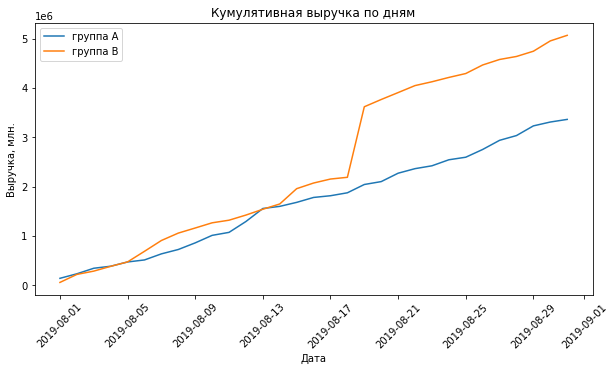

In [135]:
plt.figure(figsize=(10, 5))

plt.plot(cumulative_data_A['date'], cumulative_data_A['revenue'],
         label='группа A')

plt.plot(cumulative_data_B['date'], cumulative_data_B['revenue'],
         label='группа B')

plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Выручка, млн.')
plt.title('Кумулятивная выручка по дням')
plt.legend()

plt.show()

**Вывод**

Выручка группы А равномерно увеличивается на протяжении всего теста.

Выручка группы В тоже растет плавно, кроме очень резкого скачка 18-19/08/2019.  Это может говорить о резком увеличении числа заказов или о появлении более дорогих заказов в выборке.

Построим график кумулятивного среднего чека по дням для каждой группы. 

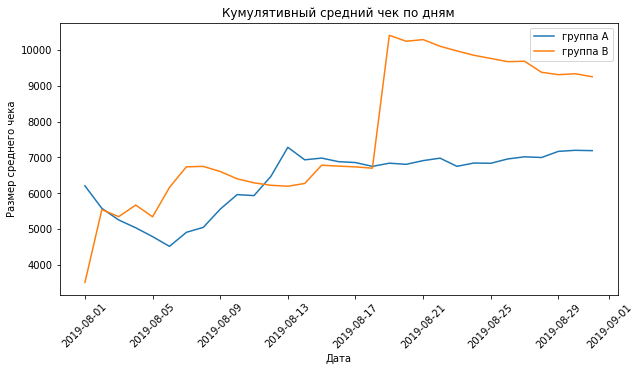

In [136]:
plt.figure(figsize=(10, 5))

plt.plot(cumulative_data_A['date'],
         cumulative_data_A['revenue']/cumulative_data_A['orders'],
         label='группа A')

plt.plot(cumulative_data_B['date'],
         cumulative_data_B['revenue']/cumulative_data_B['orders'],
         label='группа B')

plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Размер среднего чека')
plt.title('Кумулятивный средний чек по дням')
plt.legend()

plt.show()

**Вывод**

По группе А видно, что значения среднего чека примерно до серидины теста колебались, затем стабилизировались.

У группы В заметен резкий скачок 18-19/08/2019. Теперь с точной уверенностью можно сказать, что в выборку попали крупные заказы. С указанного периода размер среднего чека снижается и продолжает свое снижение к концу теста.

Необходимо проанализировать выбросы, чтобы принять решение по проведенному А/В-тесту.

Объединим таблицу с кумулятивными данными групп. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

In [137]:
merged_cumulative_data = cumulative_data_A.merge(cumulative_data_B,
                                           left_on='date', right_on='date',
                                           suffixes=['_A', '_B'])

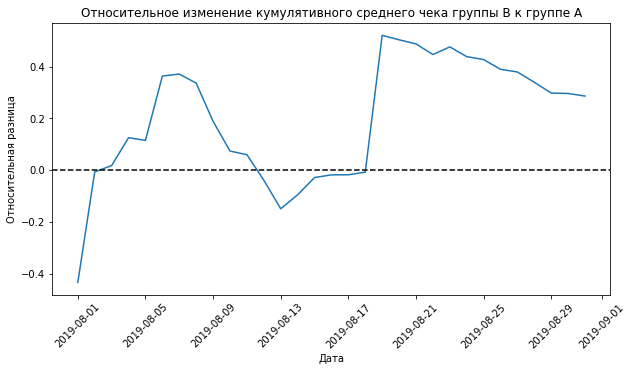

In [138]:
plt.figure(figsize=(10, 5))

plt.plot(
    merged_cumulative_data['date'],
    (merged_cumulative_data['revenue_B']/merged_cumulative_data['orders_B'])/
    (merged_cumulative_data['revenue_A']/merged_cumulative_data['orders_A'])-1
)

plt.axhline(y=0, color='black', linestyle='--') 
plt.ylabel('Относительная разница')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.title(
    'Относительное изменение кумулятивного среднего чека группы B к группе A'
    )

plt.show()

**Вывод**

График имеет скачок 18-19/08/2019 после 4 дней стабилизации. Скорее всего, в эти даты были сделаны крупные заказы в группе В.

После данного скачка наблюдается явное падение относительной разницы куммулятивного среднего чека заказа группы В по отношению к группе А. В последние 3 дня теста падение замедлилось и похоже, что показатель стабилизируется.

Посчитаем конверсию для каждой группы и сформируем отдельные датасеты . Построим график кумулятивной конверсии по датам.

In [139]:
cumulative_data['conversion'] = (
    cumulative_data['orders'] / cumulative_data['visits']
)

cumulative_data_A = cumulative_data.loc[cumulative_data['group'] == 'A']

cumulative_data_B = cumulative_data.loc[cumulative_data['group'] == 'B']

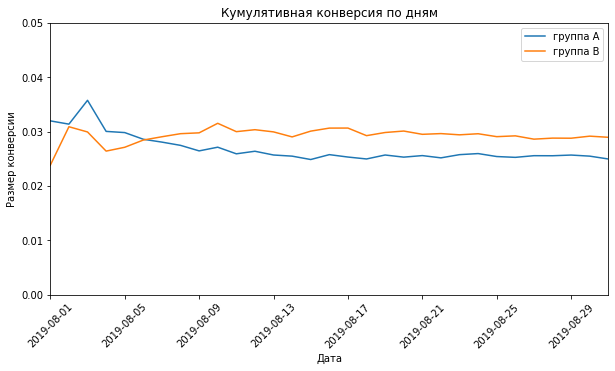

In [140]:
plt.figure(figsize=(10, 5))

plt.plot(cumulative_data_A['date'],
         cumulative_data_A['conversion'],
         label='группа A')

plt.plot(cumulative_data_B['date'],
         cumulative_data_B['conversion'],
         label='группа B')

plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Размер конверсии')
plt.title('Кумулятивная конверсия по дням')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0, 0.05])
plt.legend()

plt.show()

**Вывод**

В начале значения конверсий обеих групп колебались, но уже к середине теста стабилизировались. В итоге, конверсия группы А меньше конверсии группы В примерно на `0.5%`.

Объединим таблицу с кумулятивными данными групп. Построим график относительного изменения кумулятивной конверсии группы B к группе A.

In [141]:
merged_cumulative_data = cumulative_data_A.merge(cumulative_data_B,
                                           left_on='date', right_on='date',
                                           suffixes=['_A', '_B'])

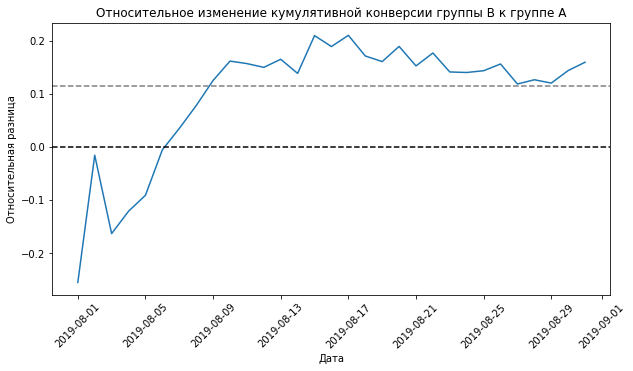

In [142]:
plt.figure(figsize=(10, 5))

plt.plot(
    merged_cumulative_data['date'],
    merged_cumulative_data['conversion_B']/
    merged_cumulative_data['conversion_A']-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.115, color='grey', linestyle='--') 

plt.ylabel('Относительная разница')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.title(
    'Относительное изменение кумулятивной конверсии группы B к группе A'
    )

plt.show()

**Вывод**

Уже с шестого дня теста конверсия группы В больше конверсии группы А. Значения все еще колеблются, в конце теста наблюдает тенденция на рост. Конверсия группы В явно выше конверсии группы А, тенденция на изменение в обратную сторону не наблюдается.

### Анализ выбросов

При обзоре данных в начале было видно, что стоимость заказов в первых пяти строках соответствующей таблицы варируется от 400 до 9700. Возможно, в таблице есть и другие крупные заказы, которые могут искажать результаты.

Чтобы определить, какая стоимость заказов будет считаться выбросами, построим гистограмму распределения стоимостей заказов и точечный график, а также определим 90, 95 и 99 перцентили.


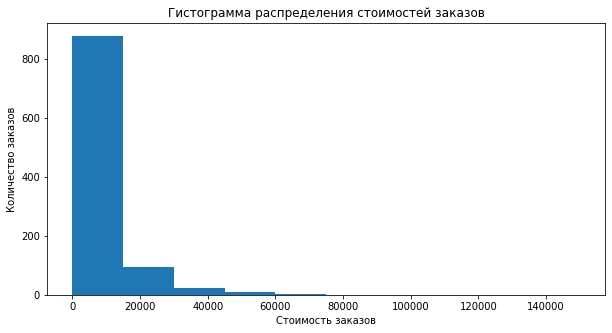

In [143]:
plt.figure(figsize=(10, 5))

plt.hist(orders['revenue'], range=(0, 150000))

plt.xlabel('Стоимость заказов')
plt.ylabel('Количество заказов')
plt.title('Гистограмма распределения стоимостей заказов')

plt.show()

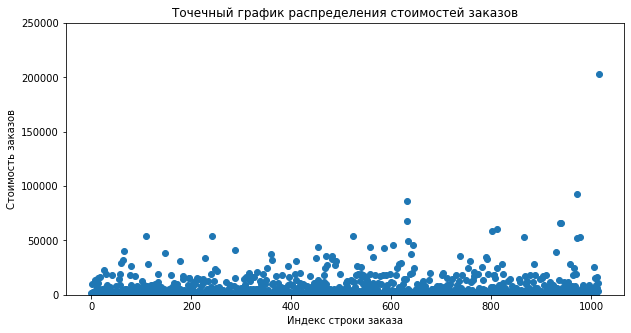

In [144]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10, 5))

plt.scatter(x_values, orders['revenue']) 

plt.ylim(0, 250000)
plt.xlabel('Индекс строки заказа')
plt.ylabel('Стоимость заказов')
plt.title('Точечный график распределения стоимостей заказов')

plt.show()

In [145]:
np.percentile(orders['revenue'], [90, 95, 99])

array([17990., 26785., 53904.])

In [146]:
# посмотрим на самый крупный заказ
orders.loc[orders['revenue'] == orders['revenue'].max()] 

,transaction_id,visitor_id,date,revenue,group
365,590470918,1920142716,2019-08-19,1294500,B


**Вывод**

Самый дорогой заказ был сделан на суму 1,29 млн. 19/08/2019. Как было видно на графиках выше, именно этот заказ исказил результаты теста для группы В. 

99% заказов были сделаны на сумму до 54 тыс., а 95% - меньше 27 тыс. Если смотреть на гистограмму распределения стоимости заказов, то корзины с заказами после 60 тыс. уже плохо заметны невооруженным глазом. Таким образом, для дальнейшего анализа следует брать заказы до 53 тыс., так мы уберем 1-2% заказов, искажающих результаты теста.


Теперь создадим датасет с количеством заказов на одного уникального пользователя и проделаем то же самое с ним.

In [147]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False).
    agg({'transaction_id' : 'nunique'})
)

orders_by_users.columns = ['visitor_id', 'orders']

orders_by_users.sort_values(by='orders', ascending=False).head(10)

,visitor_id,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


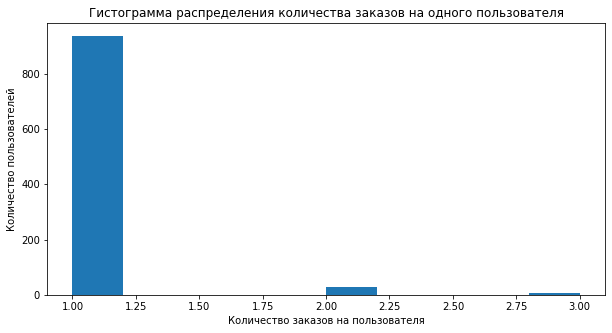

In [148]:
plt.figure(figsize=(10, 5))

plt.hist(orders_by_users['orders'])

plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Количество пользователей')
plt.title('Гистограмма распределения количества заказов на одного пользователя')

plt.show()

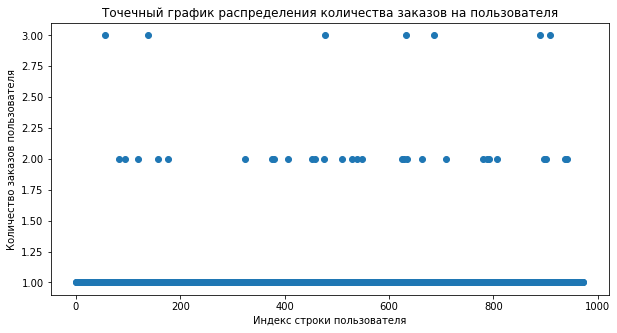

In [149]:
x_values = pd.Series(range(0, len(orders_by_users['orders'])))

plt.figure(figsize=(10, 5))

plt.scatter(x_values, orders_by_users['orders']) 

plt.xlabel('Индекс строки пользователя')
plt.ylabel('Количество заказов пользователя')
plt.title('Точечный график распределения количества заказов на пользователя')

plt.show()

In [150]:
np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 1., 2.])

**Вывод**

Наибольшее количество заказов за месяц теста на одного пользователя - 3.

В то же время 99% пользователей совершили не более 2 заказов, а 95% - не более 1. Таким образом, для дальнейшего анализа следует брать пользователей, совершивших 2 или 1 заказ, так мы уберем 1% пользователей, искажающих результаты теста.


### Анализ статистической значимости

Прежде чем проверять гипотезы и анализировать статистическую значимость, необходимо собрать данные, которые будут включать количество посещений, заказов и общую сумма заказов в день для каждой группы, а также кумулятивные данные этих показателей.

In [151]:
# получим строки таблицы visits для группы А, т.е. определим количество
# посещений за каждый день теста

visits_daily_A = visits.loc[visits['group'] == 'A', ['date', 'visitors']]

visits_daily_A.columns = ['date', 'visitors_per_day_A']

# получим строки таблицы visits_daily_A, дата которых меньше или равна дате
# элемента из этой же таблицы;
# вычислим максимальную дату и количество посещений,
# применим методы к каждой строке

cumulative_visits_A = visits_daily_A.apply(
    lambda x: visits_daily_A[visits_daily_A['date'] <= x['date']].
    agg({'date' : 'max', 'visitors_per_day_A' : 'sum'}), axis=1)

cumulative_visits_A.columns = ['date', 'visitors_cumulative_A']

In [152]:
# сделаем то же самое для группы В

visits_daily_B = visits.loc[visits['group'] == 'B', ['date', 'visitors']]

visits_daily_B.columns = ['date', 'visitors_per_day_B']

cumulative_visits_B = visits_daily_B.apply(
    lambda x: visits_daily_B[visits_daily_B['date'] <= x['date']].
    agg({'date' : 'max', 'visitors_per_day_B' : 'sum'}), axis=1)

cumulative_visits_B.columns = ['date', 'visitors_cumulative_B']

In [153]:
# получим строки таблицы orders для группы А, сгруппируем данные по дате
# и для каждой даты найдем количество уникальных заказов и общую прибыль

orders_daily_A = (
    orders.loc[orders['group'] == 'A', ['date', 'visitor_id',
                                        'transaction_id', 'revenue']].
                  groupby('date', as_index=False).
                  agg({'transaction_id' : pd.Series.nunique,
                       'revenue' : 'sum'})
)

orders_daily_A.columns = ['date', 'orders_per_day_A', 'revenue_per_day_A']

# получим строки таблицы orders_daily_A, дата которых меньше или равна дате
# элемента из этой же таблицы;
# вычислим максимальную дату, количество заказов и общую прибыль,
# применим методы к каждой строке и отсортируем полученную таблицу

cumulative_orders_A = orders_daily_A.apply(
    lambda x: orders_daily_A[orders_daily_A['date'] <= x['date']].
    agg({'date' : 'max',
         'orders_per_day_A' : 'sum',
         'revenue_per_day_A' : 'sum'}), axis=1).sort_values(by='date')

cumulative_orders_A.columns = ['date', 'orders_cumulative_A',
                               'revenue_cumulative_A']

In [154]:
# сделаем то же самое для группы В

orders_daily_B = (
    orders.loc[orders['group'] == 'B', ['date', 'visitor_id',
                                        'transaction_id', 'revenue']].
                  groupby('date', as_index=False).
                  agg({'transaction_id' : pd.Series.nunique,
                       'revenue' : 'sum'})
)

orders_daily_B.columns = ['date', 'orders_per_day_B', 'revenue_per_day_B']

cumulative_orders_B = orders_daily_B.apply(
    lambda x: orders_daily_B[orders_daily_B['date'] <= x['date']].
    agg({'date' : 'max',
         'orders_per_day_B' : 'sum',
         'revenue_per_day_B' : 'sum'}), axis=1).sort_values(by='date')

cumulative_orders_B.columns = ['date', 'orders_cumulative_B',
                               'revenue_cumulative_B']

In [155]:
# объединим все полученные таблицы

data = (
    orders_daily_A.merge(
        orders_daily_B, left_on='date', right_on='date', how='left'
        )
    .merge(cumulative_orders_A, left_on='date', right_on='date', how='left')
    .merge(cumulative_orders_B, left_on='date', right_on='date', how='left')
    .merge(visits_daily_A, left_on='date', right_on='date', how='left')
    .merge(visits_daily_B, left_on='date', right_on='date', how='left')
    .merge(cumulative_visits_A, left_on='date', right_on='date', how='left')
    .merge(cumulative_visits_B, left_on='date', right_on='date', how='left')
)

#### Гипотеза: по "сырым" данным различий в конверсии между группами нет.

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным. 

**Н0:** нет различий в конверсии между группами.

**Н1:** есть различия в конверсии между группами.

In [156]:
# создадим таблицу, в которой каждому пользователю из группы А будет 
# соответствовать число осуществленных им заказов

orders_by_users_A = (
    orders.loc[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : pd.Series.nunique})
)

orders_by_users_A.columns = ['visitor_id', 'orders']

In [157]:
# создаем такую же таблицу для группы В

orders_by_users_B = (
    orders.loc[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id' : pd.Series.nunique})
)

orders_by_users_B.columns = ['visitor_id', 'orders']

In [158]:
# создадим Series, в котором к колонке 'orders' из orders_by_users_A будут
# добавлены строки с нулями в количестве пользователей, которые не совершали
# покупок, из-за чего не попали в таблицу orders_by_users_A

sample_A = pd.concat(
    [orders_by_users_A['orders'],
     pd.Series(0, index=np.arange(data['visitors_per_day_A'].sum() -
                                  len(orders_by_users_A['orders'])),
               name='orders')], axis=0)

In [159]:
# создаем Series для группы В по такому же принципу

sample_B = pd.concat(
    [orders_by_users_B['orders'],
     pd.Series(0, index=np.arange(data['visitors_per_day_B'].sum() -
                                  len(orders_by_users_B['orders'])),
               name='orders')], axis=0)

In [160]:
# проверяем гипотезу

alpha = 0.05  # критический уровень статистической значимости

results_conv_raw = (st.mannwhitneyu(
    sample_A, sample_B, alternative='two-sided'
    )[1]).round(4)

print('p-значение: ', results_conv_raw)

if results_conv_raw < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('Относительное различие в конверсии группы B к группе A:',
      '{0:.3f}'.format(sample_B.mean() / sample_A.mean() - 1))

p-значение:  0.011
Отвергаем нулевую гипотезу: разница статистически значима
Относительное различие в конверсии группы B к группе A: 0.160


**Вывод**

Принимаем альтернативную гипотезу, т.к. p-value = 0.011 меньше 0.05, т.е. по "сырым данным" разница в конверсии групп A и B статистически значима.

Группа В выигрывает у группы А с преимуществом в 16%.

#### Гипотеза: по "сырым" данным различий в среднем чеке заказа между группами нет.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 

**Н0:** нет различий в среднем чеке заказа между группами.

**Н1:** есть различия в среднем чеке заказа между группами.

In [161]:
# критический уровень статистической значимости остается 0.05

results_check_raw = (
    st.mannwhitneyu(
        orders.loc[orders['group'] == 'A', 'revenue'],
        orders.loc[orders['group'] == 'B', 'revenue'],
        alternative='two-sided')[1]
        ).round(4)

print('p-значение: ', results_check_raw)

if results_check_raw < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print(
    'Относительное различие в конверсии группы B к группе A:',
    '{0:.3f}'.format(orders.loc[orders['group'] == 'B', 'revenue'].mean() /
                     orders.loc[orders['group'] == 'A', 'revenue'].mean() - 1)
    )

p-значение:  0.8295
Не получилось отвергнуть нулевую гипотезу
Относительное различие в конверсии группы B к группе A: 0.287


**Вывод**

Не получилось отвергнуть нулевую гипотезу, т.к. p-value = 0.8295 больше 0.05, т.е. по "сырым данным" различие в среднем чеке заказа в 28.7% группы В по отношении к группе А статистически не значима.

#### Гипотеза: по "очищенным" данным различий в среднем чеке заказа между группами нет.

Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным. 

**Н0:** нет различий в конверсии между группами.

**Н1:** есть различия в конверсии между группами.

In [162]:
# подготовим данные:
# отберем пользователей из группы А и группы В, совершивших 3 заказа;
# отберем пользователей, совершивших заказы на сумму более 53000;
# соединим их в один Series

many_orders_users = pd.concat(
    [orders_by_users_A.loc[orders_by_users_A['orders'] >=
                           np.percentile(orders_by_users_A['orders'], 99),
                           'visitor_id'],
     orders_by_users_B.loc[orders_by_users_B['orders'] >=
                           np.percentile(orders_by_users_B['orders'], 99),
                           'visitor_id']],
     axis=0
     )

expensive_orders_users = orders.loc[orders['revenue'] >=
                                    np.percentile(orders['revenue'], 99),
                                    'visitor_id']

extra_users = (
    pd.concat([many_orders_users, expensive_orders_users], axis=0)
    .drop_duplicates()
    .sort_values()
)

len(extra_users) # посчитаем количество полученных пользователей

35

Всего 35 пользователей. Посмотрим, как их отсутствие отразится на результатах проверки гипотез.

In [163]:
# создадим Series, в котором к колонке 'orders' из orders_by_users_A будут
# добавлены строки с нулями в количестве пользователей, которые не совершали
# покупок, из-за чего не попали в таблицу orders_by_users_A

not_extra_sample_A = pd.concat(
    [orders_by_users_A.loc[
                           np.logical_not(orders_by_users_A['visitor_id']
                                          .isin(extra_users)), 'orders'
                           ],
     pd.Series(0, index=np.arange(data['visitors_per_day_A'].sum() -
                                  len(orders_by_users_A['orders'])),
               name='orders')], axis=0)

In [164]:
# создаем Series для группы В по такому же принципу

not_extra_sample_B = pd.concat(
    [orders_by_users_B.loc[
                           np.logical_not(orders_by_users_B['visitor_id']
                                          .isin(extra_users)), 'orders'
                           ],
     pd.Series(0, index=np.arange(data['visitors_per_day_B'].sum() -
                                  len(orders_by_users_B['orders'])),
               name='orders')], axis=0)

In [166]:
# проверяем гипотезу

# критический уровень статистической значимости остается 0.05

results_conv_not_extra = (
    st.mannwhitneyu(not_extra_sample_A, not_extra_sample_B,
                    alternative='two-sided')[1]
    ).round(4)

print('p-значение: ', results_conv_not_extra)

if results_conv_not_extra < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print('Относительное различие в конверсии группы B к группе A:',
      '{0:.3f}'.format(
          not_extra_sample_B.mean() / not_extra_sample_A.mean() - 1
          ))

p-значение:  0.0258
Отвергаем нулевую гипотезу: разница статистически значима
Относительное различие в конверсии группы B к группе A: 0.122


**Вывод**

Принимаем альтернативную гипотезу, т.к. p-value = 0.0258 меньше 0.05, т.е. по "очищенным" данным различия в конверсии группы B по отношению к группе А в 12.2% статистически значима, как и по "сырым".

#### Гипотеза: по "очищенным" данным различий в среднем чеке заказа между группами нет.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "очищенным" данным. 

**Н0:** нет различий в среднем чеке заказа между группами.

**Н1:** есть различия в среднем чеке заказа между группами.

In [167]:
results_check_not_extra = st.mannwhitneyu(
            orders.loc[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(extra_users)),
                ), 'revenue'],
            orders.loc[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(extra_users)),
                ), 'revenue'],
        )[1]

In [169]:
# критический уровень статистической значимости остается 0.05

results_check_not_extra = (
    st.mannwhitneyu(
        orders.loc[
                   np.logical_and(
                       orders['group'] == 'A',
                       np.logical_not(
                           orders['visitor_id']
                           .isin(extra_users)
                           )
                   ), 'revenue'],
                    orders.loc[
                               np.logical_and(
                                   orders['group'] == 'B',
                                   np.logical_not(
                                       orders['visitor_id']
                                       .isin(extra_users)
                                       )
                                   ), 'revenue'], alternative='two-sided')[1]
                           ).round(4)

print('p-значение: ', results_check_not_extra)

if results_check_not_extra < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

print(
    'Относительное различие в конверсии группы B к группе A:',
    '{0:.3f}'.format(
        orders.loc[
                   np.logical_and(
                       orders['group'] == 'A',
                       np.logical_not(
                           orders['visitor_id']
                           .isin(extra_users)
                           )
                   ), 'revenue']
                     .mean() /
                     orders.loc[np.logical_and(
                         orders['group'] == 'B',
                         np.logical_not(
                             orders['visitor_id']
                             .isin(extra_users)
                             )
                         ), 'revenue']
                     .mean() - 1
                     )
    )

p-значение:  0.8272
Не получилось отвергнуть нулевую гипотезу
Относительное различие в конверсии группы B к группе A: -0.003


**Вывод**

Не получилось отвергнуть нулевую гипотезу, т.к. p-value = 0.8272 больше 0.05, т.е. по "очищенным" данным различие в среднем чеке заказа групп A и B в 0.3% статистически не значимо, как и по "сырым".

## Общий вывод

1. Самыми перспективными гипотезами являются:
* "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
* "добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей";
* "показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию".

Данные гипотезы имеют наилучший баланс между силой гипотезы и количеством пользователей, на которых они могут повлиять.

---

2. Кумулятивная выручка группы А плавно росла на протяжении всего теста. У группы В так же наблюдается плавный рост, но со скачком 19/08/2022, после чего продолжается рост, параллельный группе А. Поскольку к середине теста данные стабилизировались и группа В демонстрировала лучший объем выручки по отношению к группе А, то, исключив скачок и учитывая параллельный рост, можно сделать вывод о том, что куммулятивная выручка группы В выше группы А.

---

3. Куммулятивный средний чек показывает обратную ситуацию, но с сохранением скачка. У группы В наблюдается резкое падение куммулятивного среднего чека после скачка 19/08/2022. Учитывая стабилизацию показателя группы А с плавным ростом, резкое падение показателя группы В и ее демонстрацию худшего показателя до скачка, нежели показатель группы А, можно сделать вывод о том, что куммулятивный средний чек группы В ниже группы А.

---

4. Примерно то же самое показывает и куммулятивная разница среднего чека группы В к группе А: после скачка 19/08/2022 наблюдается резкий спад показателя. Поскольку до скачка данный показатель был приближен к 0, то можно сделать вывод о том, что относительная разница демонстрирует преимущество группы А.

---

5. Куммулятивная конверсия групп стабилизировалась к концу теста. Можно однозначно сказать, что конверсия группы В больше конверсии группы А примерно на `0.5%`.

---

6. Относительное изменение конверсии группы В к группе А показывает, что с шестого дня теста конверсия группы В больше конверсии группы А. С девятого дня теста относительная разница конверсия группы В по отношению к группе А не опускалась ниже 11.5%. Значения еще колебаются, но тенденция на изменение в обратную сторону не наблюдается, в конце теста наблюдает тенденция на дальнейшее увеличение относительной разницы.

---

7. Самый дорогой заказ, исказивший результаты теста, был сделан на суму 1,29 млн. 19/08/2019. 99% заказов были сделаны на сумму до 54 тыс., а 95% - меньше 27 тыс.

---

8. Наибольшее количество заказов на одного пользователя за анализируемый период равно трем. 99% пользователей осуществили два заказа за месяц, а 95% - один.

---

9. Различия в конверсии групп A и B статистически значима как по "сырым" данным, так и по "очищенным". По "сырым" данным группа В выигрывает у группы А с преимуществом в 16%, по очищенным - 12.2%.

---

10. Различия в среднем чеке групп A и B статистически не значимы как по "сырым" данным, так и по "очищенным", p-value равен 41% в обоих случаях при критическом уровне статистической значимости в 5%. По "сырым" данным группа В выигрывает у группы А с преимуществом в 28.7%, а по очищенным преимущество у группы А в 0.3%.

---

**Итог:**

Учитывая вышеизложенное, можно остановить тест, т.к. он оказался успешным: группа В показывает лучшую выручку и конверсию по сравнению с группой А. Средний чек группы В меньше среднего чека группы А, но различия статистически не значимы.

---

*Есть пользователи, которые одновременно попали в группу А и группу В. Это могло произойти из-за того, что не была налажена система разделения трафика между группами, возможно, не был проведен А/А-тест до А/В-теста. По этой причине пришлось удалить данные о заказах 58 пользователей, или 15%. Данное обстоятельство следует учесть при проведении дальнейших исследований.*